In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df = pd.read_csv('sea_level_rise_data.csv')
print(df.shape)
df.describe()

(1111, 2)


,Time,Sea level
count,1111.000000,1111.000000
mean,2008.094105,7.668911
std,8.722321,27.942958
min,1993.011526,-39.100000
25%,2000.545898,-18.400000
50%,2008.107393,2.870000
75%,2015.640815,34.970000
max,2023.173943,60.090000


In [ ]:
df.sample(5)
df.head()

,Time,Sea level
0,1993.011526,-38.57
1,1993.038692,-39.10
2,1993.065858,-38.58
3,1993.093025,-38.35
4,1993.120191,-37.24


In [ ]:
target_column = ['Sea level']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Time,Sea level
count,1111.000000,1111.000000
mean,0.992546,7.668911
std,0.004311,27.942958
min,0.985092,-39.100000
25%,0.988816,-18.400000
50%,0.992553,2.870000
75%,0.996277,34.970000
max,1.000000,60.090000


In [ ]:
import seaborn as sns

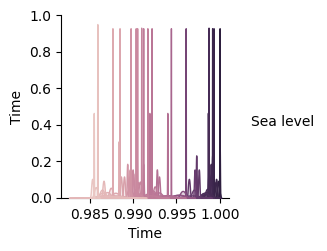

In [ ]:
sns.pairplot(df,hue='Sea level')

In [ ]:
df.corr()

,Time,Sea level
Time,1.000000,0.989068
Sea level,0.989068,1.000000


<Axes: >

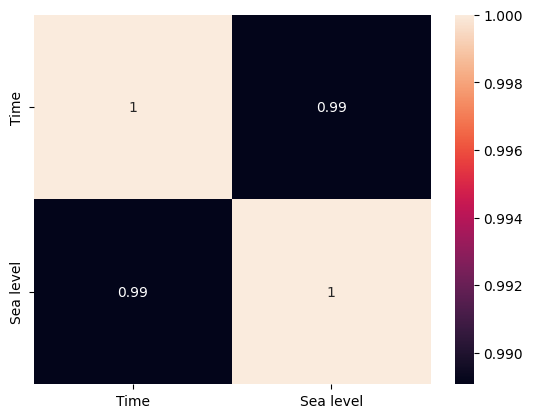

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(777, 1)
(334, 1)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test, pred_test_lr))



4.113822297853287
0.9788062681082008
4.138705456421271
0.9767317258262513


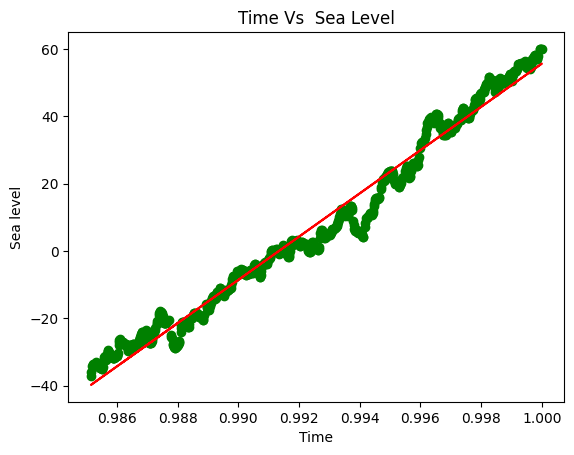

In [ ]:
#visualizing the training set results
plt.scatter(X_train, y_train, color="green")
plt.plot(X_train, pred_train_lr, color="red")
plt.title("Time Vs  Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()



In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))



12.04878130098789
0.8181963394062778
11.473207777433771
0.8211846279782402


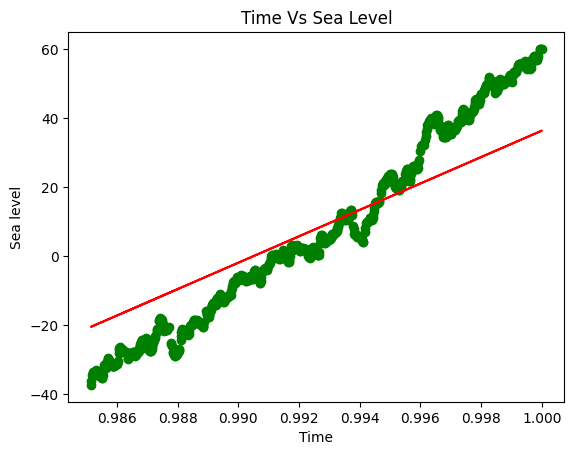

In [ ]:
#visualizing the training set results
plt.scatter(X_train, y_train, color="green")
plt.plot(X_train, pred_train_rr, color="red")
plt.title("Time Vs Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))



4.713178598527536
0.9721808296199578
4.564479716539134
0.9716979628739474


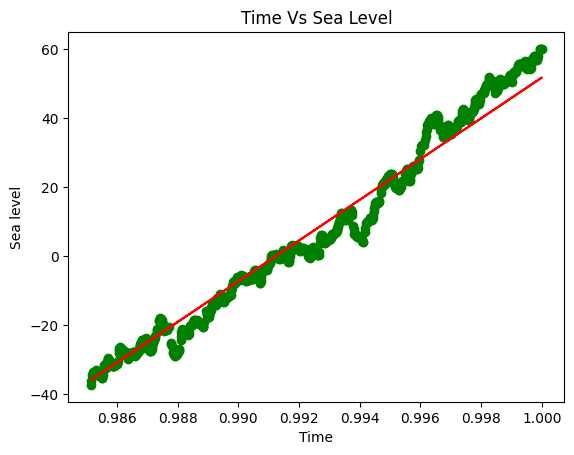

In [ ]:
#visualizing the training set results
plt.scatter(X_train, y_train, color="green")
plt.plot(X_train, pred_train_lasso, color="red")
plt.title("Time Vs Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()

In [ ]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train)
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))



28.158146893617868
0.007056537421961884
27.064982454105206
0.00493687367169493


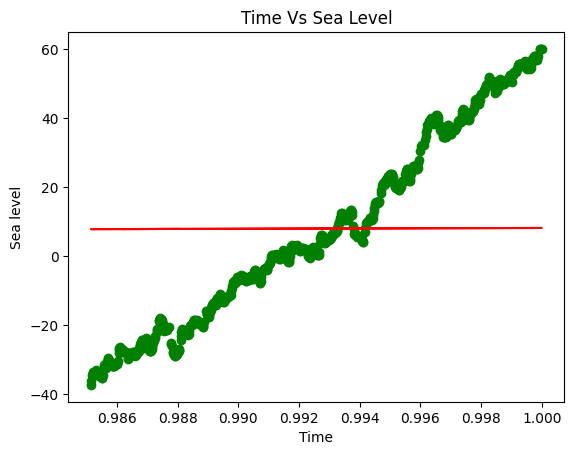

In [ ]:
#visualizing the training set results
plt.scatter(X_train, y_train, color="green")
plt.plot(X_train, pred_train_enet, color="red")
plt.title("Time Vs Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Generate sample regression data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sea_level_rise_data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate individual regression models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.5)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Create the ensemble model
ensemble_model = VotingRegressor([('linear', linear_model),
                                  ('lasso', lasso_model),
                                  ('ridge', ridge_model),
                                  ('elasticnet', elasticnet_model)])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_test)

# Evaluate the performance of the ensemble model
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", mse)
print(r2_score(y_test, y_pred))

Mean Squared Error: 4.249138462895934
0.9740896386590309


In [ ]:
#multi-linear-regression models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

4.160380982182457
0.9775352073828677


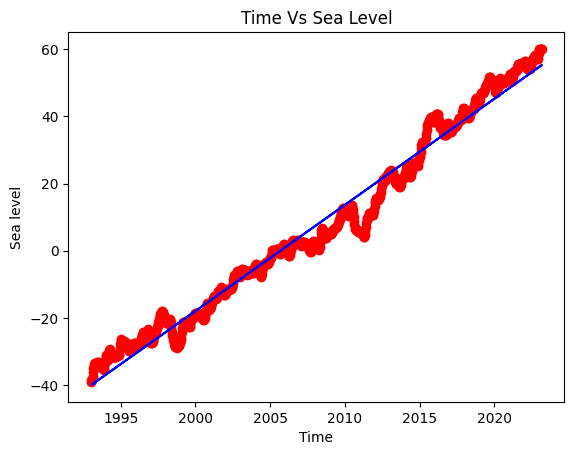

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title("Time Vs Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()

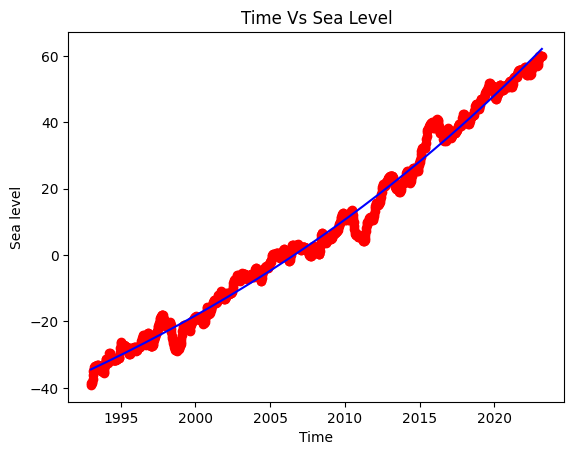

3.049740341247822
0.988077370591986


In [ ]:
#polynomial regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title("Time Vs Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()

from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y, lin_reg_2.predict(poly_reg.fit_transform(X)))))
print(r2_score(y, lin_reg_2.predict(poly_reg.fit_transform(X))))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


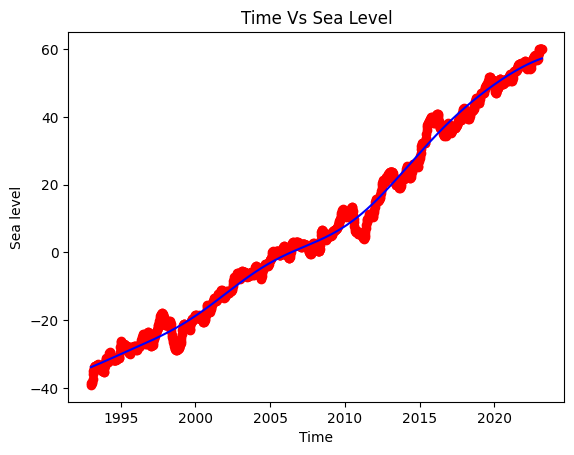

2.5057763262493067
0.991951204010832


In [ ]:
#Polynomial Regression
y = y.reshape(len(y),1)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

#Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

# Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

# Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title("Time Vs Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()

from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(sc_y.inverse_transform(y), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))))
print(r2_score(sc_y.inverse_transform(y), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1))))

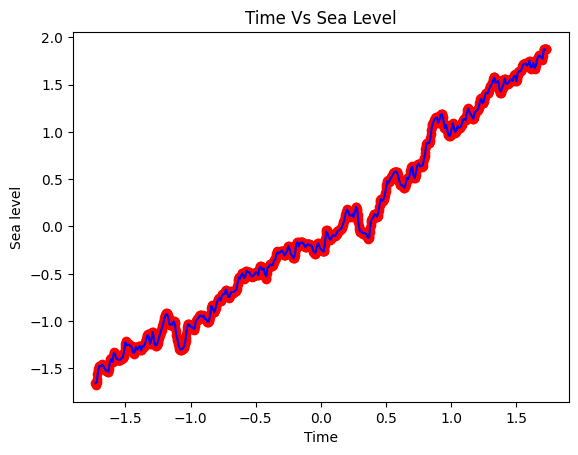

28.344423422035522
-0.03140048211235724
29.231877919468282
-0.10904620834549794
0.0
1.0


array([1.88])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Time Vs Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()

from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_train,regressor.predict(X_train))))
print(r2_score(y_train,regressor.predict(X_train)))

from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_test,regressor.predict(X_test))))
print(r2_score(y_test,regressor.predict(X_test)))

from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y,regressor.predict(X))))
print(r2_score(y,regressor.predict(X)))
regressor.predict([[1994.614329]])

<ipython-input-93-069a49d54997>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


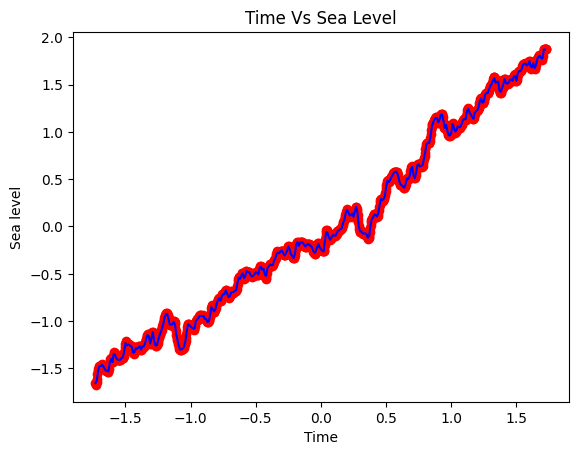

0.004696776151522879
0.9999779402937825


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Time Vs Sea Level")
plt.xlabel("Time")
plt.ylabel("Sea level")
plt.show()

from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y,regressor.predict(X))))
print(r2_score(y,regressor.predict(X)))